In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform (low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform (low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitiudes and longitutdes to a list. 
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities. append(city)
        
 #Print the city count to confirm sufficient count.
len(cities)

589

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bull savanna
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | shakhovskaya
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | katsuura
Processing Record 8 of Set 1 | chenghai
Processing Record 9 of Set 1 | mikhaylovka
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | narsaq
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | tungor
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | champerico
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | aklavik
Processing Record 21 of Set 1 | barentsburg
City not found. Skipping...
Process

Processing Record 38 of Set 4 | dubbo
Processing Record 39 of Set 4 | constitucion
Processing Record 40 of Set 4 | provideniya
Processing Record 41 of Set 4 | hermanus
Processing Record 42 of Set 4 | boma
Processing Record 43 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 44 of Set 4 | caravelas
Processing Record 45 of Set 4 | aban
Processing Record 46 of Set 4 | mount isa
Processing Record 47 of Set 4 | lebu
Processing Record 48 of Set 4 | alotau
City not found. Skipping...
Processing Record 49 of Set 4 | worthington
Processing Record 50 of Set 4 | hamilton
Processing Record 1 of Set 5 | andevoranto
City not found. Skipping...
Processing Record 2 of Set 5 | tadine
Processing Record 3 of Set 5 | norman wells
Processing Record 4 of Set 5 | te anau
Processing Record 5 of Set 5 | tasiilaq
Processing Record 6 of Set 5 | nador
Processing Record 7 of Set 5 | esperance
Processing Record 8 of Set 5 | muisne
Processing Record 9 of Set 5 | ambon
Processing Record 10 of

Processing Record 27 of Set 8 | tukrah
Processing Record 28 of Set 8 | balkhash
Processing Record 29 of Set 8 | north bend
Processing Record 30 of Set 8 | smithville
Processing Record 31 of Set 8 | naryan-mar
Processing Record 32 of Set 8 | makhachkala
Processing Record 33 of Set 8 | maamba
Processing Record 34 of Set 8 | udachnyy
Processing Record 35 of Set 8 | adrar
Processing Record 36 of Set 8 | mortka
Processing Record 37 of Set 8 | palmerston
Processing Record 38 of Set 8 | port macquarie
Processing Record 39 of Set 8 | buenos aires
Processing Record 40 of Set 8 | iqaluit
Processing Record 41 of Set 8 | husavik
Processing Record 42 of Set 8 | santiago de cao
Processing Record 43 of Set 8 | hihifo
City not found. Skipping...
Processing Record 44 of Set 8 | rudbar
Processing Record 45 of Set 8 | salinopolis
Processing Record 46 of Set 8 | kamen-na-obi
Processing Record 47 of Set 8 | upernavik
Processing Record 48 of Set 8 | thinadhoo
Processing Record 49 of Set 8 | port lincoln
Pro

Processing Record 13 of Set 12 | viransehir
Processing Record 14 of Set 12 | victoria
Processing Record 15 of Set 12 | katherine
Processing Record 16 of Set 12 | sinkat
City not found. Skipping...
Processing Record 17 of Set 12 | port keats
Processing Record 18 of Set 12 | atar
Processing Record 19 of Set 12 | karratha
Processing Record 20 of Set 12 | la ronge
Processing Record 21 of Set 12 | progreso
Processing Record 22 of Set 12 | mayumba
Processing Record 23 of Set 12 | alamos
Processing Record 24 of Set 12 | erzin
Processing Record 25 of Set 12 | zhashkiv
Processing Record 26 of Set 12 | san miguel
Processing Record 27 of Set 12 | garm
City not found. Skipping...
Processing Record 28 of Set 12 | chepareria
Processing Record 29 of Set 12 | cerro largo
Processing Record 30 of Set 12 | lasa
Processing Record 31 of Set 12 | margate
Processing Record 32 of Set 12 | sechura
Processing Record 33 of Set 12 | iracoubo
Processing Record 34 of Set 12 | manado
Processing Record 35 of Set 12 |

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bull Savanna,17.8868,-77.5902,73.99,84,86,9.15,JM,2021-01-13 00:04:42
1,Bredasdorp,-34.5322,20.0403,68.00,94,99,12.66,ZA,2021-01-13 00:04:42
2,Arraial Do Cabo,-22.9661,-42.0278,76.64,84,89,23.31,BR,2021-01-13 00:04:42
3,Shakhovskaya,56.0283,35.5097,12.47,97,98,7.81,RU,2021-01-13 00:04:43
4,Hobart,-42.8794,147.3294,75.99,49,20,11.50,AU,2021-01-13 00:02:59
5,Ushuaia,-54.8000,-68.3000,50.00,53,20,17.27,AR,2021-01-13 00:04:43
6,Katsuura,35.1333,140.3000,41.00,93,20,4.61,JP,2021-01-13 00:01:33
7,Chenghai,23.4632,116.7680,35.60,87,6,2.24,CN,2021-01-13 00:04:43
8,Mikhaylovka,50.0600,43.2379,19.00,91,99,7.92,RU,2021-01-13 00:04:43
9,Rikitea,-23.1203,-134.9692,77.79,79,5,17.09,PF,2021-01-13 00:00:25


In [10]:
citydata_reorder = ["City", "Country", "Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[citydata_reorder]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bull Savanna,JM,2021-01-13 00:04:42,17.8868,-77.5902,73.99,84,86,9.15
1,Bredasdorp,ZA,2021-01-13 00:04:42,-34.5322,20.0403,68.00,94,99,12.66
2,Arraial Do Cabo,BR,2021-01-13 00:04:42,-22.9661,-42.0278,76.64,84,89,23.31
3,Shakhovskaya,RU,2021-01-13 00:04:43,56.0283,35.5097,12.47,97,98,7.81
4,Hobart,AU,2021-01-13 00:02:59,-42.8794,147.3294,75.99,49,20,11.50
5,Ushuaia,AR,2021-01-13 00:04:43,-54.8000,-68.3000,50.00,53,20,17.27
6,Katsuura,JP,2021-01-13 00:01:33,35.1333,140.3000,41.00,93,20,4.61
7,Chenghai,CN,2021-01-13 00:04:43,23.4632,116.7680,35.60,87,6,2.24
8,Mikhaylovka,RU,2021-01-13 00:04:43,50.0600,43.2379,19.00,91,99,7.92
9,Rikitea,PF,2021-01-13 00:00:25,-23.1203,-134.9692,77.79,79,5,17.09


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'01/12/21'

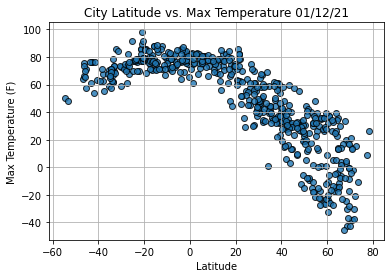

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

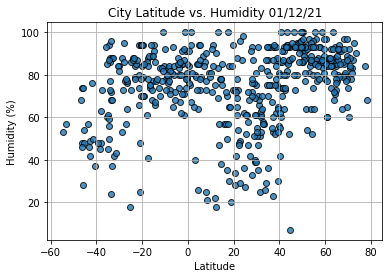

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

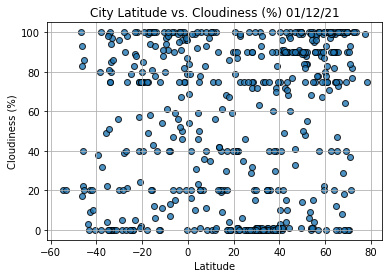

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

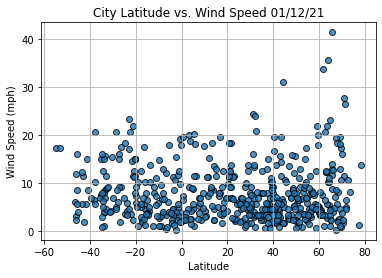

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()